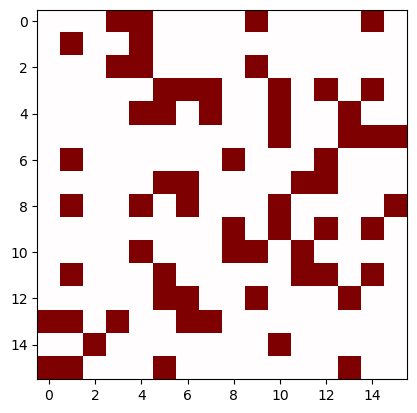

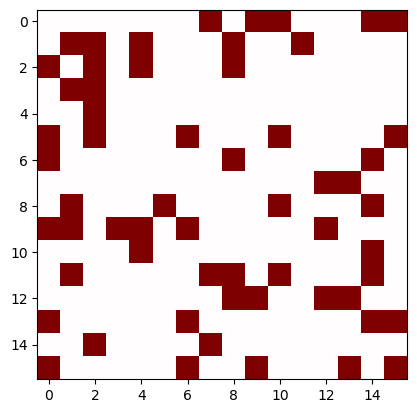

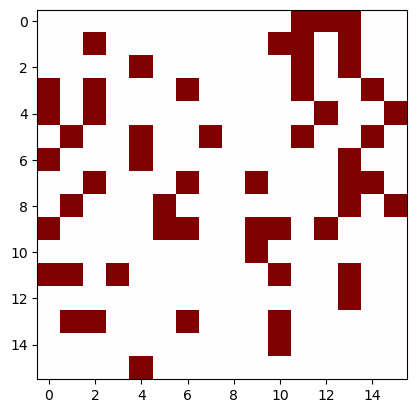

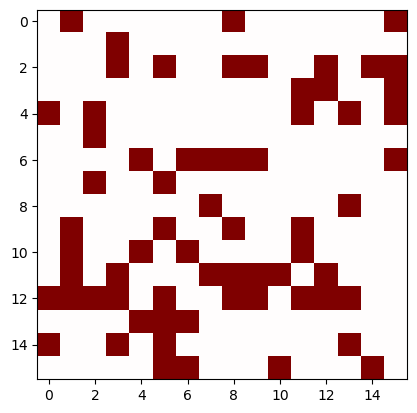

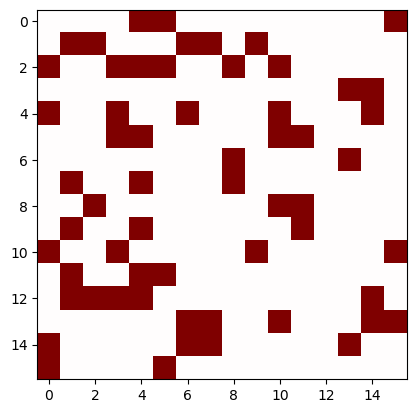

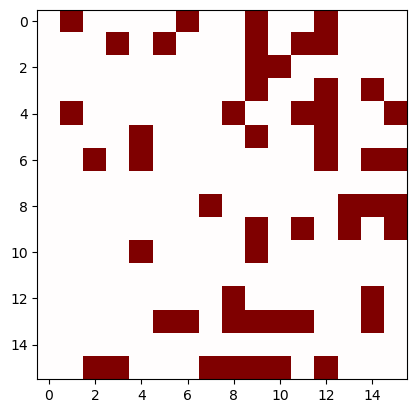

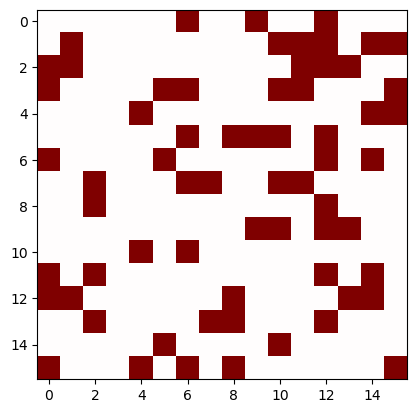

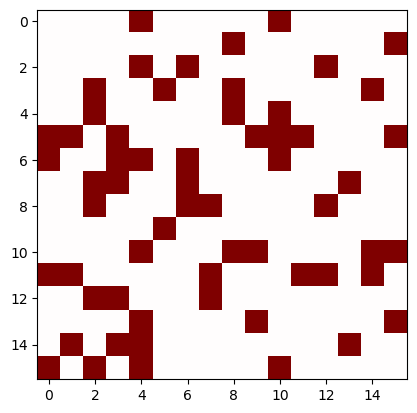

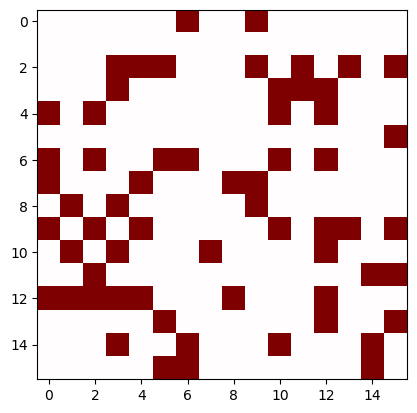

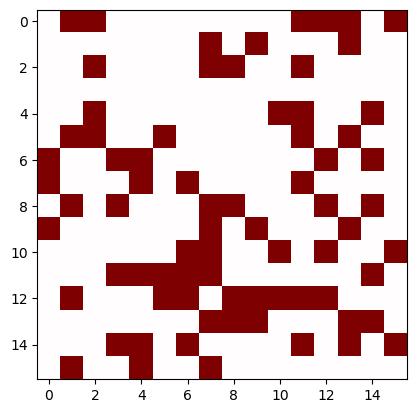

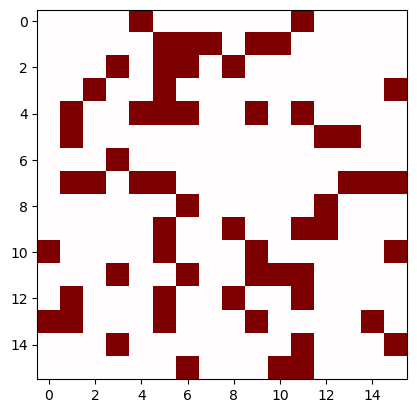

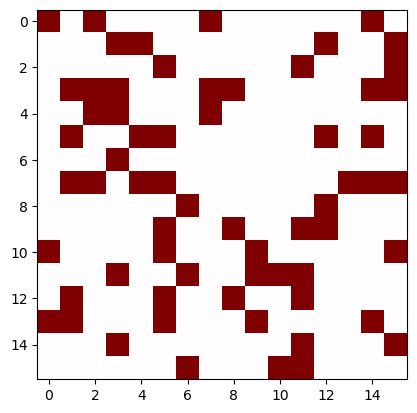

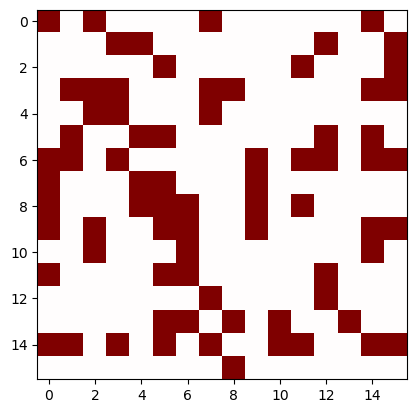

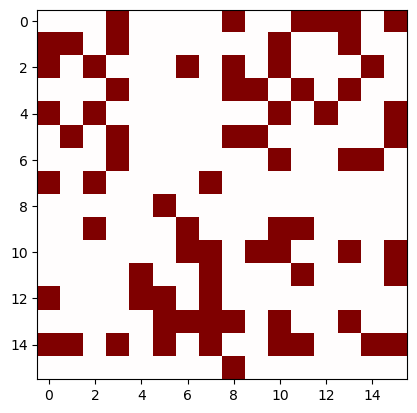

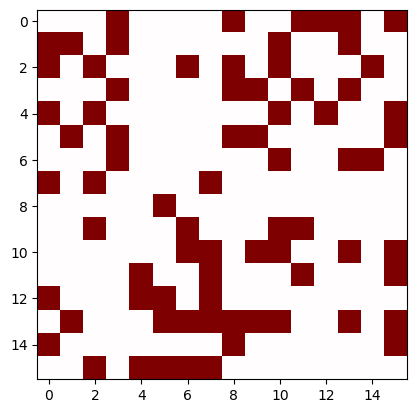

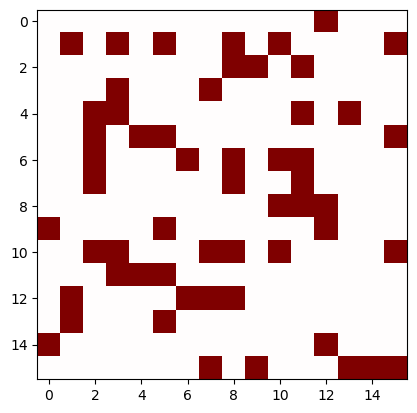

In [1]:
from load_data import load_h5_to_dict
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import h5py

module_path = os.path.abspath(os.path.join('..', 'Git/RFAnalysis/sta_analysis/sta_analysis'))
if module_path not in sys.path:
    sys.path.append(module_path)

from receptive_field_filter import *
from receptive_field_analysis import *
from util_plotting import *
from correlations import *

config_file = "config.toml"
with open(config_file, "r") as f:
    config = toml.load(f)

start = config["st_calculation"]["start"]
end = config["st_calculation"]["end"]

led_log_with_lookuptab = 'data/2025-09-08T16-41-48_LED_LOG_LD1_LED-Mapping_Laslo_with-Lookuptab_HS277_HS277.txt'
led_log_without_lookuptab = 'data/2025-09-08T16-46-17_LED_LOG_LD1_LED-Mapping_Laslo_without-Lookuptab_HS277_HS277.txt'

def parse_arduino_line(line: str) -> list[int]:
    """Parses a line of data from the Arduino txt file and converts it into a list of integers.

    Args:
        line: A string representing a line of semicolon-separated values from the Arduino txt file.

    Returns:
        A list of integers parsed from the input string.
    """
    return [int(entry) for entry in line.split(";")]

patterns = []

# with open(led_log_with_lookuptab, 'r') as file:
with open(led_log_without_lookuptab, 'r') as file:
        for line in file:
            row = parse_arduino_line(line.strip())
            if row[-1] in {120, 119, 118}:
                if any(row[6:-1]):
                    patterns.append(row[6:-1])  # skip header + tail
            else:
                continue

# for pattern in patterns:
#     pattern = np.unpackbits(np.uint8(pattern))
#     pattern = pattern.reshape(16, 16)
#     plt.imshow(pattern, cmap = 'seismic', vmin = -1, vmax = 1)
#     plt.show()


rotations = {
    'top_left':     0,
    'top_right':    0,
    'bottom_left':  0,
    'bottom_right': 0
}

for pattern in patterns:
    pattern = np.unpackbits(np.uint8(pattern))
    pattern = pattern.reshape(16, 16)
    
    tl = pattern[0:8, 0:8]
    tr = pattern[0:8, 8:16]
    bl = pattern[8:16, 0:8]
    br = pattern[8:16, 8:16]

    # cache = br
    # br = tl
    # tl = cache

    tl = np.rot90(tl, rotations['top_left'])
    tr = np.rot90(tr, rotations['top_right'])
    bl = np.rot90(bl, rotations['bottom_left'])
    br = np.rot90(br, rotations['bottom_right'])

    
    
    # tl = np.flip(tl, axis = 1)
    # tr = np.flip(tr, axis = 1)
    # bl = np.flip(bl, axis = 1)
    # br = np.flip(br, axis = 1)
    
    top_row = np.hstack((tl, tr))
    bottom_row = np.hstack((bl, br))
    
    rotated_pattern = np.vstack((top_row, bottom_row))

    plt.imshow(rotated_pattern, cmap='seismic', vmin=-1, vmax=1)
    plt.show()